In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv("C:/Users/sanja/Downloads/data-export (1).csv")

In [34]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [38]:
df.columns = df.iloc[0]
df=df.drop(index=0).reset_index(drop = True)
df.columns = ["channel group","Datehour","Users","Sessions","Engaged sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [41]:
df["Datehour"] = pd.to_datetime(df["Datehour"],format="%Y%m%d%H" , errors='coerce')
numeric_cols = df.columns.drop(["channel group","Datehour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric , errors='coerce')
df["hour"] = df["Datehour"].dt.hour
df.head(6)

,channel group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
5,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3181 non-null   object        
 1   Datehour                             3181 non-null   datetime64[ns]
 2   Users                                3181 non-null   int64         
 3   Sessions                             3181 non-null   int64         
 4   Engaged sessions                     3181 non-null   int64         
 5   Average engagement time per session  3181 non-null   float64       
 6   Engaged sessions per user            3181 non-null   float64       
 7   Events per session                   3181 non-null   float64       
 8   Engagement rate                      3181 non-null   float64       
 9   Event count                          3181 non-null   int64         
 10  hour        

In [47]:
sns.set(style="whitegrid")

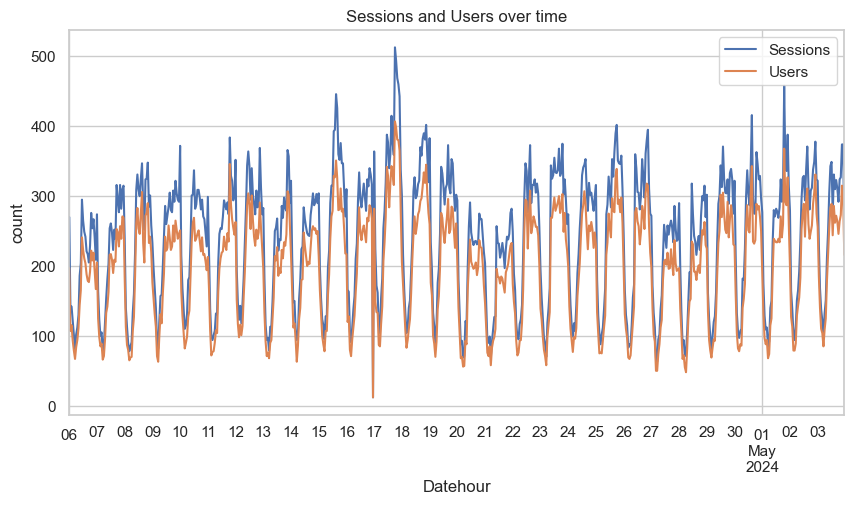

In [50]:
plt.figure(figsize=(10,5))
df.groupby("Datehour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over time")
plt.xlabel("Datehour")
plt.ylabel("count")
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_2532\1461196399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum,palette="viridis")


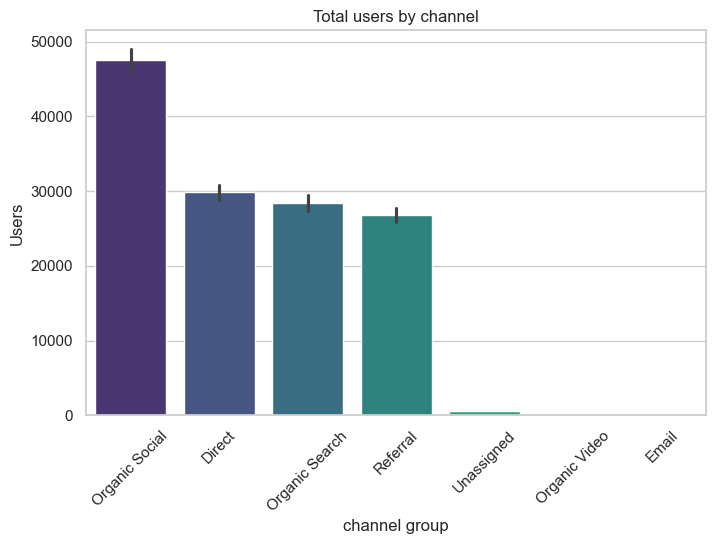

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum,palette="viridis")
plt.title("Total users by channel")
plt.xticks(rotation=45)
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_2532\774822940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Average engagement time per session", estimator=np.mean, palette="magma")


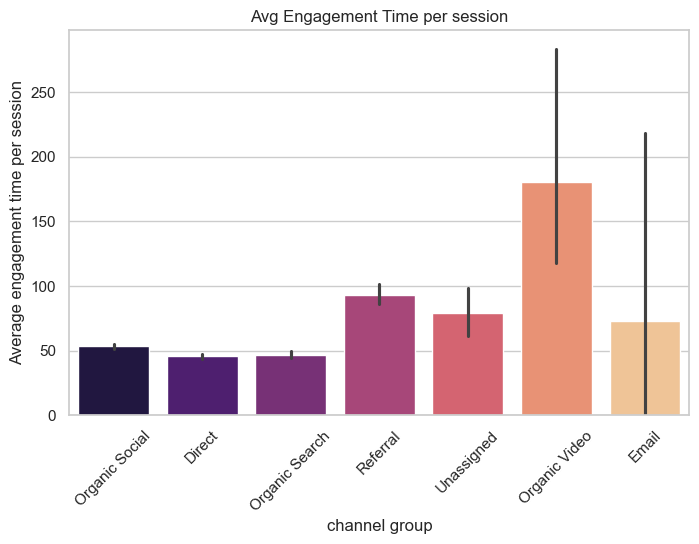

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Average engagement time per session", estimator=np.mean, palette="magma")
plt.title("Avg Engagement Time per session")
plt.xticks(rotation=45)
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_2532\4133362870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")


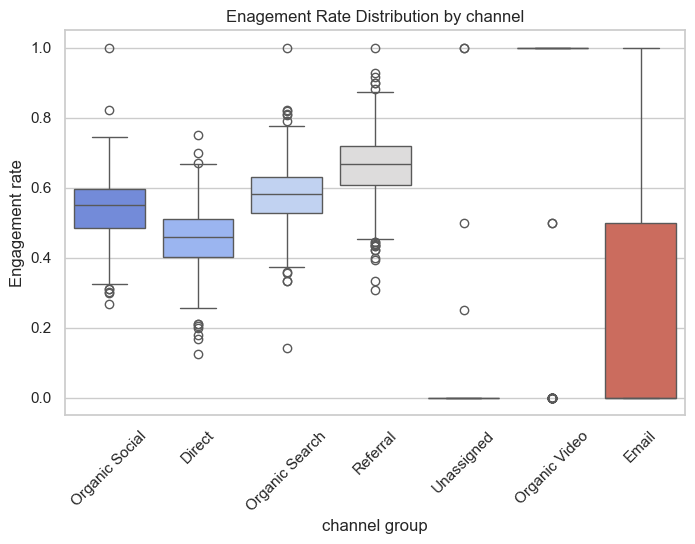

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")
plt.title("Enagement Rate Distribution by channel")
plt.xticks(rotation=45)
plt.show()